In [1]:
import numpy as np 
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt 
from datetime import date

In [2]:
#Créer la dataframe : définir la date de début et de fin, les titres 
Asset = ["AAPL","META","MSFT","AMZN","TSLA","GOOGL","MCD"]

startDate = date(2010,1,1)
endDate = date(2024,8,1)

prix = yf.download(Asset,startDate,endDate )["Adj Close"]

[*********************100%%**********************]  7 of 7 completed


In [3]:
rendement = np.log(prix/prix.shift(1))
rendement.dropna(inplace=True)
rendement

Ticker,AAPL,AMZN,GOOGL,MCD,META,MSFT,TSLA
Date,,,,,,,
2012-05-21,0.056626,0.019725,0.022578,0.015681,-0.116378,0.016266,0.042968
2012-05-22,-0.007708,-0.012828,-0.021912,0.000767,-0.093255,0.000336,0.068181
2012-05-23,0.024107,0.009015,0.014311,0.001531,0.031749,-0.022084,0.007118
2012-05-24,-0.009226,-0.009433,-0.009562,0.000546,0.031680,-0.001375,-0.024145
2012-05-25,-0.005375,-0.010978,-0.020299,-0.005257,-0.034497,-0.000344,-0.015644
...,...,...,...,...,...,...,...
2024-07-25,-0.004816,-0.005434,-0.031482,-0.007567,-0.017187,-0.024786,0.019531
2024-07-26,0.002159,0.014627,-0.001675,0.002145,0.026745,0.016286,-0.002045
2024-07-29,0.001284,0.003828,0.015036,0.036699,0.000021,0.003427,0.054450


In [4]:
Er = np.array([rendement.mean()]) #au cas pense à utiliser la fct np.array()
Std = rendement.std()
VarCov = rendement.cov()

In [5]:
VU = np.ones((7,1)) #attention à dimension du vecteur unitaire
inv_VarCov = np.linalg.inv(VarCov)

In [6]:
print(VU.shape)
print(inv_VarCov.shape)

(7, 1)
(7, 7)


In [7]:
GMV = (inv_VarCov@VU)/(VU.T@inv_VarCov@VU)
Er_GMV = GMV.T@Er.T
Std_GMV = np.sqrt(np.dot(np.dot(GMV.T,VarCov),GMV))

In [8]:
Er_rf = np.array([rendement.mean() - 0.02]) #Convertir les rendements excédentaires 
                                            #en array() permet de faire les transposés 
Sharpe = (inv_VarCov@Er_rf.T)/(VU.T@inv_VarCov@Er_rf.T)
Er_Sharpe = Sharpe.T@Er.T
Std_Sharpe = np.sqrt(np.dot(np.dot(Sharpe.T,VarCov),Sharpe))

In [9]:
Cov_GMV_Sharpe = np.array(GMV.T@VarCov@Sharpe)

w_GMV = np.linspace(-2,3,100)
w_Sharpe = 1 - w_GMV

Er_fr_eff = (w_GMV * Er_GMV + w_Sharpe * Er_Sharpe)
Std_fr_eff = np.sqrt(((w_GMV*Std_GMV)**2+(w_Sharpe*Std_Sharpe)**2+2*w_GMV*w_Sharpe*Cov_GMV_Sharpe))

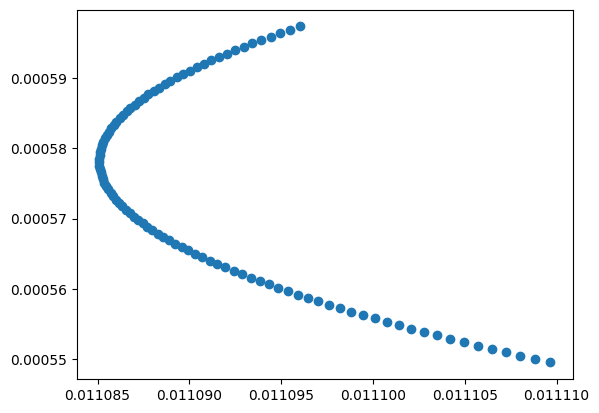

In [10]:
plt.scatter(Std_fr_eff,Er_fr_eff,)
plt.show()